<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #9**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. IRIS 데이터 클러스터링

Clustering 실습을 하기 위해 이제까지 많이 사용했었던 IRIS 데이터를 이용하여 실습을 진행해보도록 하겠다. 우선 데이터를 load한 후 Sepal에 관련된 feature만 남기고 나머지는 제거한다. Clustering은 scikit-learn의 KMeans 함수를 이용하여 생성 및 학습한다. 따라서 Sepal에 관련된 두 가지 feature를 이용한 clustering 학습을 진행하도록 하겠다. 진행과정은 아래와 같다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
X = iris_frame.iloc[:,:-1]
Y = iris_frame.iloc[:,[-1]]
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df1 = iris_frame[["sepal length (cm)" , "sepal width (cm)" ]]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

#모델 생성 및 예측
model = KMeans(n_clusters = 3, algorithm='auto')
model.fit(df1)
predict = pd.DataFrame(model.predict(df1))
predict.columns = ['predict']

학습시킨 후 결과를 plot해본다. 각각의 색은 cluster를 나타내며 빨간 점은 각 cluster의 중심이다. 잘 clustering이 된 것 같지만 왼쪽 아래처럼 파란색에 묶여야 할 것 같은 점이 노란색으로 묶여있는 것을 볼 수 있다.

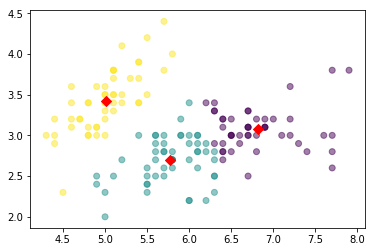

In [ ]:
r = pd.concat([df1,predict],axis=1)
plt.scatter(r["sepal length (cm)"] , 
            r["sepal width (cm)" ], 
            c=r['predict'],
                alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,
                       columns = ["sepal length (cm)" , "sepal width (cm)" ])

center_x = centers["sepal length (cm)"]
center_y = centers["sepal width (cm)"]
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

그 다음 cluster의 개수를 1에서 10까지 돌려보면서 적절한 cluster의 개수를 찾아보자. Inertia value는 군집화가 된 후에 각 중심점에서 군집의 데이터까지의 거리를 모두 합산한 것으로 군집의 응집도를 나타내는 값이다. 이 값이 작을수록 응집도가 높게 군집화가 잘 되었다고 볼 수 있다. 따라서 아래를 보면 inertia 값이 급격하게 하강한 후 6부터는 변화의 폭이 크지 않은 것을 확인할 수 있다. Inertia가 너무 작으면 overfitting의 위험이 있기 때문에 5~6개의 cluster로 분류하는 것이 적절하다고 판단할 수 있다.

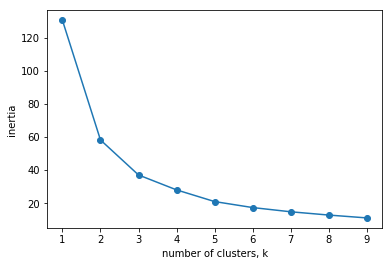

In [ ]:
ks = range(1,10)
iner=[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    iner.append(model.inertia_)
plt.plot(ks,iner,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

아래의 결과는 각각 Cluster가 2, 3, 6, 9일 때의 결과이다. 결과에서도 볼 수 있듯이 6개 정도가 가장 적절한 클러스터의 개수로 판단할 수 있다.

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1.JPG to 1.JPG
User uploaded file "1.JPG" with length 28143 bytes


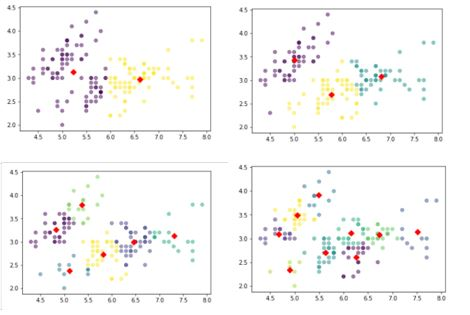

In [2]:
from IPython.display import Image
Image('1.JPG')

### 2. Digit 데이터 클러스터링

이번에는 iris 데이터가 아닌 scikit-learn의 손글씨 데이터인 the digit dataset을 대상으로 hierarchical clustering을 실시해보도록 하자. Hierarchical clustering은 scipy.cluster.hierarchy 모듈의 dendrogram과 linkage 모듈을 이용하여 실시한다. 우선 digit data를 load한다. Digit data는 8*8 사이즈의 숫자 손글씨 이미지 데이터이다. 이를 시각화 하면 아래와 같다.

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

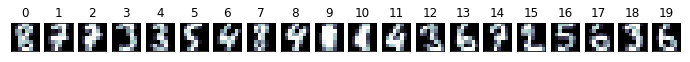

In [ ]:
digits=load_digits()
n_image = 20

np.random.seed(0)

idx = np.random.choice(range(len(digits.images)), n_image)
X = digits.data[idx]
images = digits.images[idx]
plt.figure(figsize= (12,1))

for i in range(n_image):
    plt.subplot(1, n_image, i+1)
    plt.imshow(images[i], cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks(())
    plt.yticks(())
    plt.title(i)
    
    

그 다음 ward linkage를 이용하여 clustering을 진행하고 dendrogram을 확인해보자.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, 'ward')
Z

array([[ 3.        , 18.        , 23.51595203,  2.        ],
       [13.        , 19.        , 25.27844932,  2.        ],
       [ 1.        , 14.        , 28.67054237,  2.        ],
       [17.        , 21.        , 31.04298096,  3.        ],
       [ 4.        ,  7.        , 31.51190251,  2.        ],
       [ 6.        ,  8.        , 32.54228019,  2.        ],
       [ 9.        , 10.        , 33.36165464,  2.        ],
       [ 0.        , 24.        , 34.51086785,  3.        ],
       [ 2.        , 22.        , 37.03151811,  3.        ],
       [11.        , 26.        , 43.25505751,  3.        ],
       [12.        , 15.        , 45.31004304,  2.        ],
       [16.        , 20.        , 45.36151085,  3.        ],
       [ 5.        , 27.        , 53.54437412,  4.        ],
       [30.        , 32.        , 56.6892112 ,  6.        ],
       [25.        , 29.        , 60.16809786,  5.        ],
       [28.        , 34.        , 66.61618922,  8.        ],
       [31.        , 33.

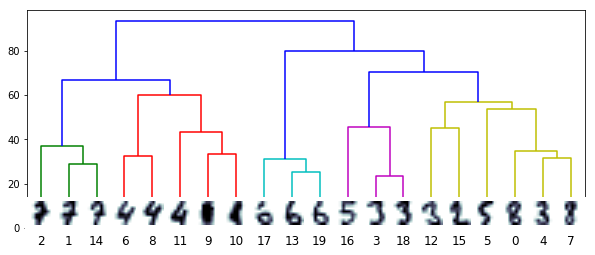

In [ ]:
#밑에 import 단에 OffsetImage 중 O,I가 대문자임.

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.figure(figsize=(10,4))
ax = plt.subplot()

ddata = dendrogram(Z)

dcoord = np.array(ddata['dcoord'])
icoord = np.array(ddata['icoord'])
leaves = np.array(ddata['leaves'])

idx = np.argsort(dcoord[:,2])
dcoord = dcoord[idx,:]
icoord = icoord[idx,:]
idx = np.argsort(Z[:,:2].ravel())
label_pos = icoord[:,1:3].ravel()[idx][:20]

for i in range(20):
    imagebox = OffsetImage(images[i], 
                           cmap = plt.cm.bone_r, 
                           interpolation = 'bilinear',
                          zoom = 3)
    ab = AnnotationBbox(imagebox, (label_pos[i],0),
                       box_alignment=(0.5,-0.1),
                       bboxprops = {"edgecolor" : "none"})
    ax.add_artist(ab)
    
plt.show()

이를 통해서 분석하자면 5개의 clustering으로 묶었을 때가 가장 정확하게 분류 한 것으로 말 할 수 있을 것이다. 

이번에는 linkage를 complete로 줘보자. Ward linkage가 분산을 가장 작게 증가시키는 두 클러스터를 합친다면 complete linkage는 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.

In [3]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 2.JPG to 2.JPG
User uploaded file "2.JPG" with length 57734 bytes


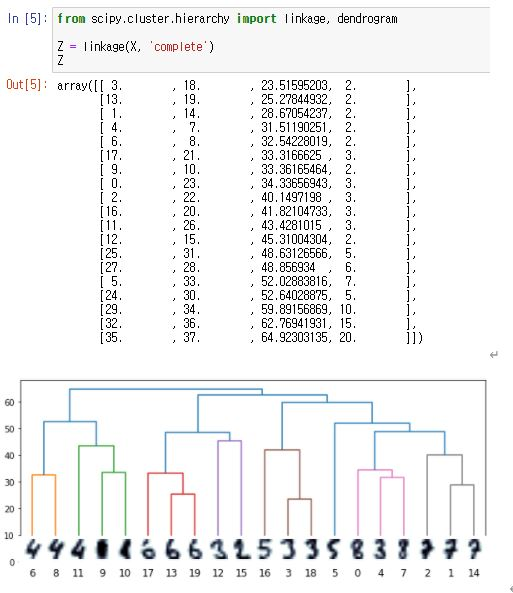

In [4]:
from IPython.display import Image
Image('2.JPG')

Linkage를 complete로 주면 위와 같은 dendrogram을 주는 것을 확인할 수 있다. 좋은 분류를 위해선 Ward linkage보다 조금 더 많은 수의 cluster을 써야할 것 같다. Dendrogram을 통해 본 필요한 clustering은 8개이다. 하지만 clustering의 숫자가 크다는 것은 그만큼 연산량과 더 많은 memory를 요한다는 것이니 ward linkage가 경제적인 면으로 보면 더 좋은 방법으로 보인다.